# ANGSD `msToGlf` pileup output

In this notebook check the output from `angsd`'s `msToGlf` `pileup` output format.

<a name="Home5"></a>

## Contents

1. [ `ms` file ](#msf)
2. [ `msToGlf` output ](#m2G)
    - 2.1. [ depth 30 ](#m2G1)
        + [ Questions ](#Q1)
    - 2.2. [ depth 1 ](#m2G2)
        + [ Questions ](#Q2)
3. [ Calling Genotype Likelihoods with `angsd` ](#ang)
    - [ Questions ](#Q3)   




In [17]:
#import sys
#import pandas as pd
#import numpy as np
#import tskit
#import msprime
#import pyslim
#import collections

from rpy2.robjects import r, pandas2ri
%load_ext rpy2.ipython
pandas2ri.activate()

In [20]:
%%R
.libPaths(c("/maps/projects/racimolab/people/qxz396/spaceNNtime/renv/library/R-4.1/x86_64-redhat-linux-gnu", "/tmp/Rtmp9Hi1cZ/renv-system-library"))

library(ggplot2)
library(cowplot)
library(tidyverse)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1
✔ purrr   0.3.4     

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[^up](#Home5) &nbsp;

&nbsp;

<a name="msf"></a>
## 1. `ms` file


I created this `ms` file from a `treedata` structure generated with `SLiM` from which only 5 individuals (10 nodes) were sampled. As we can see, it has 280 segregating sites.

In [1]:
%%bash

head angsd_msToGlf_pileup_output/tree_5ind.ms

ms 10 1
0

//
segsites: 280
positions: 0.001293 0.003120 0.004949 0.006915 0.007865 0.008586 0.009322 0.013784 0.021461 0.021712 0.026000 0.029387 0.031837 0.034729 0.041643 0.045130 0.047251 0.049672 0.055743 0.063348 0.064051 0.064910 0.067873 0.069206 0.071987 0.072185 0.079309 0.083985 0.084377 0.095680 0.097947 0.107132 0.111095 0.113741 0.113973 0.115912 0.116790 0.117174 0.120181 0.120662 0.127584 0.129708 0.130322 0.130838 0.138846 0.144110 0.146095 0.154330 0.155345 0.156183 0.158962 0.160140 0.174608 0.176180 0.177494 0.178836 0.186454 0.188423 0.193416 0.196864 0.203559 0.208157 0.210785 0.212785 0.217107 0.221270 0.225663 0.231377 0.233638 0.234988 0.235082 0.235489 0.255296 0.257338 0.258202 0.260688 0.261620 0.263965 0.264227 0.265965 0.267636 0.269519 0.271756 0.273361 0.273828 0.281996 0.286720 0.287760 0.291872 0.292342 0.298525 0.300547 0.302079 0.307122 0.307469 0.312657 0.313913 0.315841 0.316491 0.316534 0.320659 0.320700 0.324388 0.328908 0.337861 0.337997 0.34149

[^up](#Home5) &nbsp;

&nbsp;

<a name="m2G"></a>
## 2. `msToGlf` output

With that file, I can use the `msToGlf` program in order to simulate genotype likelihoods.

Arguments:

1. in         : Input
2. out        : Output prefix
3. regLen     : Length of the region simulated. This way, it's going to simulate also some errors not only on the polymorphic sites. 
4. depth      : Depth/coverage per site of each individual
5. err        : Error rate. A value 0.005 corresponds to a 0.5% error rate.
6. pileup     : If set to 1, it will output an `mpileup` formatted output. Otherwise, if set to 0, it will output a binary compressed file with the genotype likelihoods.
7. nind       : Number of individuals
8. seed       : set the seed for reproducibility of the random process.
9. onlyPoly  : It outputs only those sites that are polymorphic.
10. depthFile : A file with the a depth per individual

sources: [link](http://www.popgen.dk/angsd/index.php/MsToGlf)

We are going to repeat the process for two values of coverages: 30x and 1x.

<a name="m2G1"></a>
#### 2.1 depth 30



In [2]:
%%bash

time msToGlf -in         angsd_msToGlf_pileup_output/tree_5ind.ms \
             -out        angsd_msToGlf_pileup_output/GL_30        \
             -regLen     10000                                    \
             -depth      30                                       \
             -err        0.015                                    \
             -pileup     1                                        \
             -nind       5                                        \
             -seed       1234                                     \
             -onlyPoly   1

-in angsd_msToGlf_pileup_output/tree_5ind.ms -out angsd_msToGlf_pileup_output/GL_30 -err 0.015000 -depth 30.000000 -Nsites 0 -singleOut 0 -regLen 10000 -printSNP 0 -onlyPoly 1 -pileup 1 -simpleRand 2 -depthFile (null) -seed 1234 -nind 5 -psmc 0 -do_seq_glf 1 -simHap 0
[openFile] angsd_msToGlf_pileup_output/GL_30 .argg
Number of samples:10
Number of replications:1
[openFileGz] angsd_msToGlf_pileup_output/GL_30.pileup.gz
doing angsd_msToGlf_pileup_output/GL_30.pileup.gz with w
[openFile] angsd_msToGlf_pileup_output/GL_30 .pgEstH

[openFileGz] angsd_msToGlf_pileup_output/GL_30.glf1.gz
doing angsd_msToGlf_pileup_output/GL_30.glf1.gz with w
[openFile] angsd_msToGlf_pileup_output/GL_30 .vPos1

real	0m0.225s
user	0m0.194s
sys	0m0.013s


The ouputs generated by `msToGlf` are:

In [3]:
ll angsd_msToGlf_pileup_output/GL_30*

-rw-r--r--. 1 qxz396    436 Dec 13 14:09 angsd_msToGlf_pileup_output/GL_30.argg
-rw-r--r--. 1 qxz396     28 Dec 13 14:09 angsd_msToGlf_pileup_output/GL_30.glf1.gz
-rw-r--r--. 1 qxz396     46 Dec 13 14:09 angsd_msToGlf_pileup_output/GL_30.pgEstH
-rw-r--r--. 1 qxz396 430616 Dec 13 14:09 angsd_msToGlf_pileup_output/GL_30.pileup.gz
-rw-r--r--. 1 qxz396   1124 Dec 13 14:09 angsd_msToGlf_pileup_output/GL_30.vPos1


<a name="Q1"></a>
> # Questions

1. Why is `.glf1.gz` output empty?

2. What are the output files:
    - `.pgEstH`
    - `.vPos1`




Now, I'm going to check the first line to see how the output looks like.

In [24]:
%%bash

zcat angsd_msToGlf_pileup_output/GL_30.pileup.gz | head -n 6 | tail -n 1

1	6	N	28	AAAAAAAAAAAAAAAAAAAAAAAAAAAA	3333333333333333333333333333	34	AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA	3333333333333333333333333333333333	29	AAAAAAAAAAAAAAAAAAAAAAAAAAAAA	33333333333333333333333333333	32	AAAAAAAAAAAAAAAAAAATAAAAAAAAAAAA	33333333333333333333333333333333	35	AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA	333333333333333333333333333333333331	7	N	32	AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA	33333333333333333333333333333333	24	AAAAAAAAAAAAAAAAAAAAAAAA	333333333333333333333333	36	AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA	333333333333333333333333333333333333	37	AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA	3333333333333333333333333333333333333	31	AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA	33333333333333333333333333333331	7	N	32	AAAAAAAAAAAAAAAAAAAAAAAAAATAAAAA	33333333333333333333333333333333	31	AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA	3333333333333333333333333333333	34	AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA	3333333333333333333333333333333333	34	AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA	3333333333333333333333333333333333	33	AAAAAAAAAAAAA

The format of this file is organized by columns. Each row is a position in the genome and for each, we have the following information:
1. Chromosome
2. Position
3. Reference bp 
4. From the forth column on, there will be information of that position per individual:
    1. Number of reads that map to that position for that individual
    2. bp of the different reads corresponding to that position
    3. quality score of each read
    
Thus, usually, there will be `3 + (# haplotypes * 3)` columns in a file, which in our case should be `3+(10*3) = 33`. However, as we can see in this example, haplotype 6 has no information for the first position and only has 2 columns. Furthermore, there should be only (# individuals * 2) haplotypes. However, there is an extra column in this file.

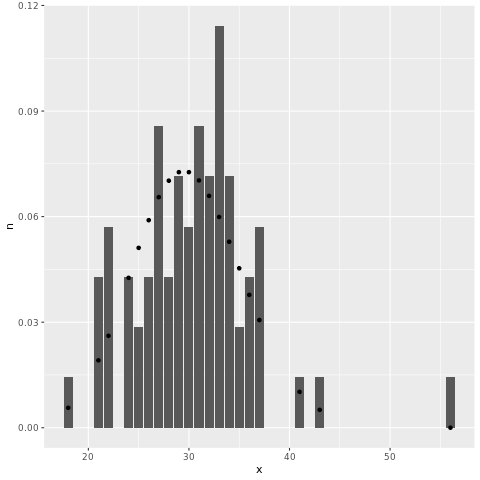

In [32]:
%%R


data.frame(x = c(21,33,30,37,29,31,27,30,33,26,29,27,28,41,30,36,22,22,29,37,24,34,25,33,25,35,27,33,22,24,27,31,21,27,43,
                 33,29,26,28,22,37,27,18,32,31,36,30,34,21,31,33,56,26,33,32,28,34,29,32,35,32,24,36,37,31,32,31,34,34,33)) %>%
    count(x) %>%
    mutate(n = n/sum(n),
           p = dpois(x = x, lambda=30)) %>%
    ggplot() +
    geom_bar(stat = "identity", aes(x = x, y = n), binwidth = 1) +
    geom_point(aes(x = x, y = p))

<a name="m2G2"></a>
#### 2.2 depth 1

Here I'm going to repeat what I did in the previous section, just changing the depth parameter.

In [5]:
%%bash

time msToGlf -in         angsd_msToGlf_pileup_output/tree_5ind.ms \
             -out        angsd_msToGlf_pileup_output/GL_1         \
             -regLen     10000                                    \
             -depth      1                                        \
             -err        0.015                                    \
             -pileup     1                                        \
             -nind       5                                        \
             -seed       1234                                     \
             -onlyPoly   1

-in angsd_msToGlf_pileup_output/tree_5ind.ms -out angsd_msToGlf_pileup_output/GL_1 -err 0.015000 -depth 1.000000 -Nsites 0 -singleOut 0 -regLen 10000 -printSNP 0 -onlyPoly 1 -pileup 1 -simpleRand 2 -depthFile (null) -seed 1234 -nind 5 -psmc 0 -do_seq_glf 1 -simHap 0
[openFile] angsd_msToGlf_pileup_output/GL_1 .argg
Number of samples:10
Number of replications:1
[openFileGz] angsd_msToGlf_pileup_output/GL_1.pileup.gz
doing angsd_msToGlf_pileup_output/GL_1.pileup.gz with w
[openFile] angsd_msToGlf_pileup_output/GL_1 .pgEstH

[openFileGz] angsd_msToGlf_pileup_output/GL_1.glf1.gz
doing angsd_msToGlf_pileup_output/GL_1.glf1.gz with w
[openFile] angsd_msToGlf_pileup_output/GL_1 .vPos1

real	0m0.049s
user	0m0.032s
sys	0m0.003s


In [6]:
%%bash

zcat angsd_msToGlf_pileup_output/GL_1.pileup.gz | head -n 1

1	0	N	1	A	3	1	A	3	1	A	3	1	A	3	1	A	31	1	N	0			0			2	AA	33	1	A	3	0		1	2	N	0			1	A	3	0			2	AA	33	1	A	31	3	N	2	CA	33	2	AA	33	0			1	A	3	1	A	31	4	N	1	A	3	1	A	3	1	A	3	1	A	3	1	A	31	5	N	1	A	3	1	A	3	1	A	3	0			0		1	5	N	1	A	3	2	AG	33	0			1	A	3	1	A	3


This output is difficult to describe and I can't find any way to match between the output and the number of individuals simulated in the data set. In the next chunk, I try to identify haplotype information which correspond to 3 consecutive columns with the information described before. However, as you can see, many rows have extra columns/information (line 6 being the first example).

<a name="Q2"></a>
> # Questions

3. Why is there an extra column in the `pileup` file for 30X coverage?
4. Is this the output expected for the `pileup` file for 1X coverage? Is there some alternative formatting I'm not aware of? 

[^up](#Home5) &nbsp;

&nbsp;

<a name="ang"></a>
## 3. Calling Genotype Likelihoods with `angsd`

In order to use `angsd` to call genotype likelihoods using the `pileup` files obtained in the previous step, I will first create a "fake" fasta file since it needs a `.fai` file.

In [7]:
with open("angsd_msToGlf_pileup_output/fasta.fa", "w") as fasta:
    fasta.write(">1\n")
    for i in range(0, 10000, 50):
        fasta.write("{}\n".format("A"*50))

In [8]:
%%bash

samtools faidx angsd_msToGlf_pileup_output/fasta.fa

In [9]:
%%bash

ls angsd_msToGlf_pileup_output/fa*

angsd_msToGlf_pileup_output/fasta.fa
angsd_msToGlf_pileup_output/fasta.fa.fai


Now that we have all the files, let's call genotype likelihoods using `angsd`

In [10]:
%%bash

time angsd -GL 2 -doCounts 1 -doMajorMinor 2 -doMaf 8  -dumpCounts 1 \
           -pileup angsd_msToGlf_pileup_output/GL_30.pileup.gz       \
           -out    angsd_msToGlf_pileup_output/GL_30_out             \
           -fai    angsd_msToGlf_pileup_output/fasta.fa.fai          \
           -doGlf  4                                                 \
           -nind   5

	-> angsd version: 0.935-53-gf475f10 (htslib: 1.14) build(Dec 13 2021 09:22:17)
	-> angsd -GL 2 -doCounts 1 -doMajorMinor 2 -doMaf 8 -dumpCounts 1 -pileup angsd_msToGlf_pileup_output/GL_30.pileup.gz -out angsd_msToGlf_pileup_output/GL_30_out -fai angsd_msToGlf_pileup_output/fasta.fa.fai -doGlf 4 -nind 5 
	-> Inputtype is pileup
	-> You are using -pileup, this means:
	-> 1) Internal positions both from front and back is coded to 255
	-> 2) All mapping qualities (mapQ) are set to 30
	-> 3) Program will not represent insertions, use raw BAM/CRAM for that
	-> Printing at chr: 1 pos:5511 chunknumber 100 contains 50 sites
	-> Done reading data waiting for calculations to finish
	-> Done waiting for threads
	-> Output filenames:
		->"angsd_msToGlf_pileup_output/GL_30_out.arg"
		->"angsd_msToGlf_pileup_output/GL_30_out.pos.gz"
		->"angsd_msToGlf_pileup_output/GL_30_out.glf.gz"
		->"angsd_msToGlf_pileup_output/GL_30_out.mafs.gz"
	-> Mon Dec 13 14:09:08 2021
	-> Arguments and parameters for all 

In [11]:
%%bash

time angsd -GL 2 -doCounts 1 -doMajorMinor 2 -doMaf 8  -dumpCounts 1 \
           -pileup angsd_msToGlf_pileup_output/GL_1.pileup.gz        \
           -out    angsd_msToGlf_pileup_output/GL_1_out              \
           -fai    angsd_msToGlf_pileup_output/fasta.fa.fai          \
           -doGlf  4                                                 \
           -nind   5

	-> angsd version: 0.935-53-gf475f10 (htslib: 1.14) build(Dec 13 2021 09:22:17)
	-> angsd -GL 2 -doCounts 1 -doMajorMinor 2 -doMaf 8 -dumpCounts 1 -pileup angsd_msToGlf_pileup_output/GL_1.pileup.gz -out angsd_msToGlf_pileup_output/GL_1_out -fai angsd_msToGlf_pileup_output/fasta.fa.fai -doGlf 4 -nind 5 
	-> Inputtype is pileup
	-> You are using -pileup, this means:
	-> 1) Internal positions both from front and back is coded to 255
	-> 2) All mapping qualities (mapQ) are set to 30
	-> 3) Program will not represent insertions, use raw BAM/CRAM for that
	-> Done reading data waiting for calculations to finish
	-> Done waiting for threads
	-> Output filenames:
		->"angsd_msToGlf_pileup_output/GL_1_out.arg"
		->"angsd_msToGlf_pileup_output/GL_1_out.pos.gz"
		->"angsd_msToGlf_pileup_output/GL_1_out.glf.gz"
		->"angsd_msToGlf_pileup_output/GL_1_out.mafs.gz"
	-> Mon Dec 13 14:09:08 2021
	-> Arguments and parameters for all analysis are located in .arg file
	-> Total number of sites analyzed: 10

And now, I can check the genotype likelihoods generated for each depth.

In [12]:
%%bash

zcat angsd_msToGlf_pileup_output/GL_30_out.glf.gz | head -n 1

1	0	0.000000	-13.755870	-9.216374	-13.755870	-104.545792	-100.006296	-104.545792	-99.318502	-100.006296	-104.545792	0.000000	-22.697185	-22.697185	-22.697185	-172.500556	-172.500556	-172.500556	-172.500556	-172.500556	-172.500556	0.000000	-15.406515	-19.946011	-19.946011	-146.364108	-147.051902	-147.051902	-151.591398	-151.591398	-151.591398	0.000000	-25.448359	-25.448359	-25.448359	-193.409715	-193.409715	-193.409715	-193.409715	-193.409715	-193.409715	0.000000	-19.946011	-19.946011	-19.946011	-151.591398	-151.591398	-151.591398	-151.591398	-151.591398	-151.591398


We can see that the GL file correspond to what we saw in the `pileup:
1. There are 10 GL values per individual. Since we have 5 individuals, and there is the information about the chromosome and SNP position, there is `2+(#individuals * 10) = 52`.
2. "A" allele tends to be the genotype with the highest likelihood. 
3. Individual 1 has 1 G read out of 21 reads. Thus, the genotype with the highest likelihood is "AG", and then , the rest of genotypes that contain an "A" allele.
4. Individual 5 has 1 G read out of 26 reads. Thus, the genotype likelihood of "AG" is smaller than the same likelihood for the first individual since it has more reads. 

If we inspect the `glf` file output of the 1X coverage case, we can see that it seems fine. However, the GL for each individual are the same. 

In [13]:
%%bash

zcat angsd_msToGlf_pileup_output/GL_1_out.glf.gz | head -n 1

1	0	0.000000	-0.687793	-0.687793	-0.687793	-5.227290	-5.227290	-5.227290	-5.227290	-5.227290	-5.227290	0.000000	-0.687793	-0.687793	-0.687793	-5.227290	-5.227290	-5.227290	-5.227290	-5.227290	-5.227290	0.000000	-0.687793	-0.687793	-0.687793	-5.227290	-5.227290	-5.227290	-5.227290	-5.227290	-5.227290	0.000000	-0.687793	-0.687793	-0.687793	-5.227290	-5.227290	-5.227290	-5.227290	-5.227290	-5.227290	0.000000	-0.687793	-0.687793	-0.687793	-5.227290	-5.227290	-5.227290	-5.227290	-5.227290	-5.227290


<a name="Q3"></a>
> # Questions

5. Is this expected? Shouldn't the GL for 1X vary much more? Is this indicative that the `pileup` file is incorrect?

[^up](#Home5) &nbsp;

&nbsp;